In [5]:
import warnings
warnings.filterwarnings('ignore')

import type_choice_space
import importlib
importlib.reload(type_choice_space)

<module 'type_choice_space' from '/Users/jingyuanwang/GitHub/NU450_HW/understand_discrete_choice/type_choice_space.py'>

# Consumer utility:

Consumers:

$ u_{ij} = \beta_{i} * x_{j} - \alpha_{i} * p_{j} + \epsilon_{ij}$

$ \beta_{i} \sim U(\beta- \frac{\sigma}{2}, \beta+ \frac{\sigma}{2}) $

Two products & 1 outside option: $x_{j} = [0, 4, 5]$, $p_{j} = [0, 2.4, 3.5]$


$\implies$

cutoff 1 : from not buying to buying low, $\beta = 0.6$, in the $[0.5, 1.5]$ case, normalized to 0.1 in $[0,1]$.

cutoff 2 : from L to H, $\beta = 1.1$, in the $[0.5, 1.5]$ case, normalized to 0.6 in $[0,1]$.


## Baseline case
default choice and when price change 0.1


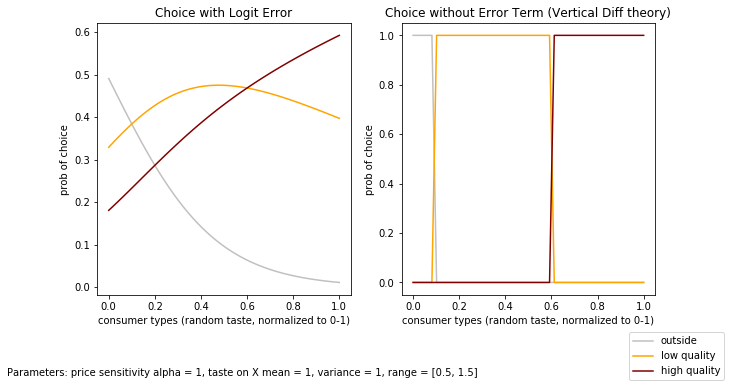

In [6]:
market = type_choice_space.one_market(beta = 1, sigma = 1, alpha = 1)
market.baseline_plot()

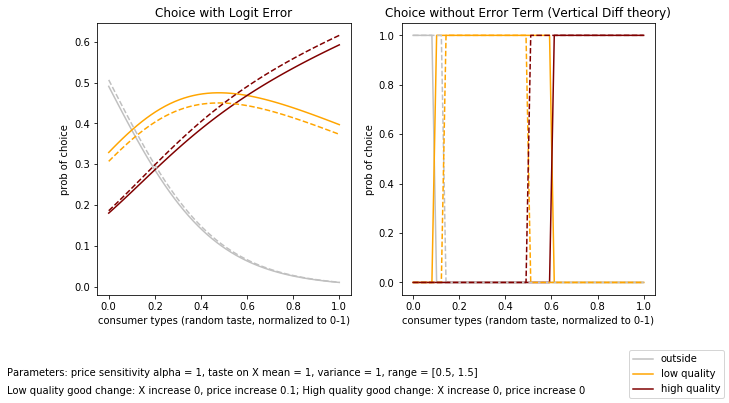

In [7]:
market.price_or_quality_change(delta_X = [0,0], delta_p = [0.1, 0])

## Difference between baseline (1,1,1) and coeff = 2,2,2
How price variation help identify BLP coeff magnitude (relative to logit error)

#### If there is truely no logit error, BLP can tell it. Because logit error help identify the scale of the parameters. In vertical differentiation model, utitlity is cardinal, we should not be able to identify all the 3 parameters.

#### 1. What if we scale up all the parameters? 
No difference in the vertial differentiation model because it is ordinal. We can see differences in the BLP model

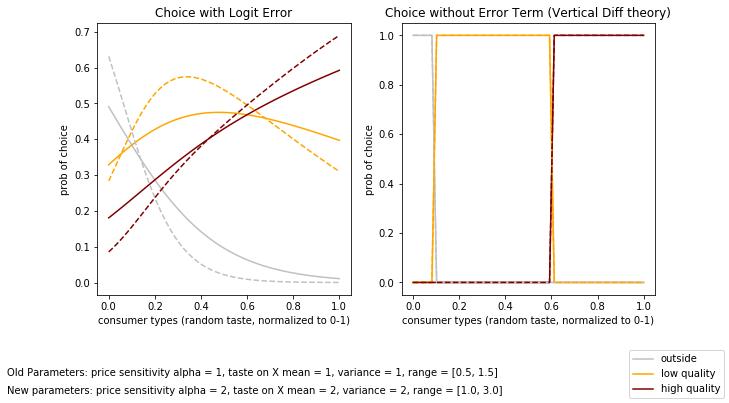

In [8]:
market.taste_change(2,2,2)

From the above figure, we know that logit error only change the probability (not the cutoff). The vertical differentiation model = set error term = 0 or scale up coeff large enough.


#### 2. Can this help identify the scale of the parameters?
Bullet point 1 says given another set of parameters which are 2 times larger, the outcome is different in individual level (of course) and in the aggregate level. 

But given the aggregate level outcome, and the observed x and prices, is there one unique set of parameters that could generate this outcome?

From the aggregate point of view, I guess $ \exists  \sigma'$ s.t. the $[\alpha, \beta, \sigma] = [1,1,1]$ output is equivalent to $[\alpha, \beta, \sigma] = [2,2,\sigma']$ )

For example, if we set $\sigma' = 2.15$, looks like the area under the dashed line = under the straight line. 

Intuitively, scale up $\alpha, \beta $ means to scale up social average evalution: more extrem. The good product is more valuable and less people prefer the lowest choice (=not buying in this case). Therefore, add more randomness on the taste parameter to make the distribution even more extreme (more super low type consumers who won't buy anything for sure) to offset the change.  What's more, $\implies $ people's choice more extreme = more certain = less effect of logit error. This is the mathematical meaning of scale up all the coeff.

The $\delta$s are twice as large as before. So all the moment conditions still hold. The change is orthogonal to the distribution of $\delta$ or any other variables. I guess that's the identification problem.

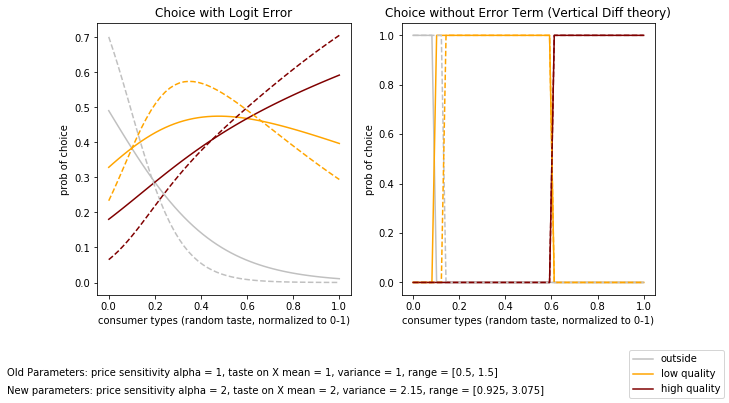

In [25]:
market.taste_change(2,2,2.15)

#### 3. What do we need to identify the scale?

Therefore, we need price variation for the same product! Introduce market 2:

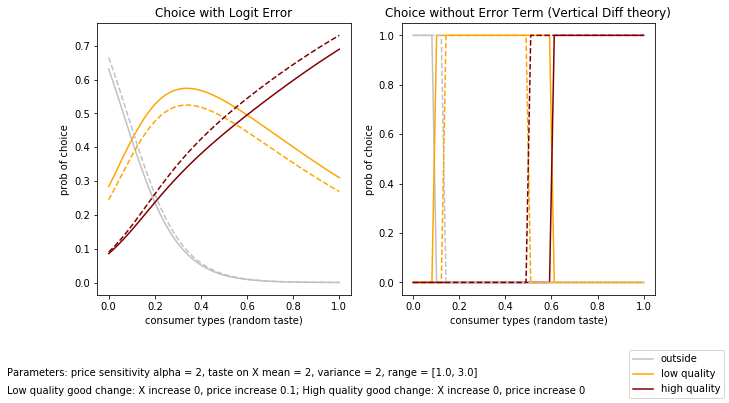

In [5]:
market2 = type_choice_space.one_market(beta = 2, sigma = 2, alpha = 2)
market2.price_or_quality_change(delta_X = [0,0], delta_p = [0.1, 0])

Compare this figure with the one above: price variation can identifies the magitute of $\alpha, \beta, \sigma$

## Difference between baseline (1,1,1) and coeff = 1,1,2

How price and characteristic variation help identify BLP coeff $\sigma $

Notice the cutoffs change: the distribution is more "divergent", so more people buy nothing or buy high.

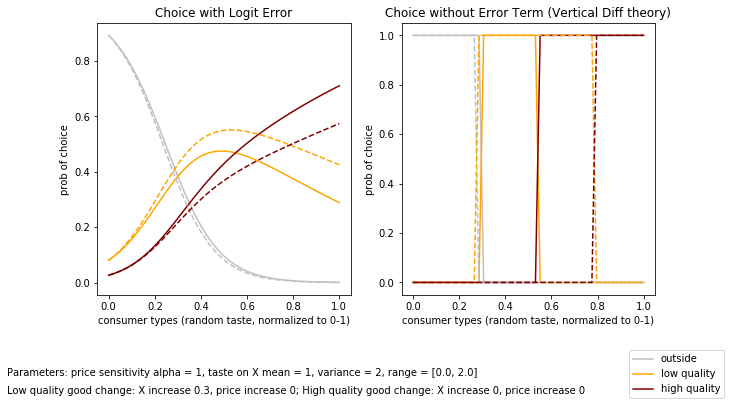

In [10]:
market2 = type_choice_space.one_market(alpha = 1, beta = 1, sigma = 2)
market2.price_or_quality_change(delta_X = [.3,0], delta_p = [0, 0])